# Reading CGMF Fission Yields

In [1]:
### initializations and import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
%pylab inline

from CGMFtk import yields as yld

Populating the interactive namespace from numpy and matplotlib


CGMF can be used to generate pre-neutron emission fission fragment yields in charge, mass, kinetic energy, excitation energy, spin, and parity. Those yields $Y(Z,A,KE,U,J,\pi)$ set the initial conditions for the decay of the fragments by emission of prompt neutrons and $\gamma$ rays.

To create an output file containing such yields, CGMF can be used with a negative number of events using the '-n' option:

./cgmf.x -i 98252 -e 0.0 -n -500000

It creates an output file that can easily be read:

In [2]:
yields = yld.Yields('98252-yields.cgmf')

The number of events in the file and number of fission fragments can be printed

In [12]:
print ('Number of events: ',yields.numberEvents)
print ('Number of fission fragments: ',yields.numberFragments)

Number of events:  500000
Number of fission fragments:  1000000


Sorting the data by mass, charge, etc, is trivial:

In [3]:
Z  = yields.getZ()
A  = yields.getZ()
KE = yields.getKE()
U  = yields.getU()
J  = yields.getJ()
p  = yields.getP()

The total kinetic energy and total excitation energy of each event is also easily available

In [13]:
TKE = yields.getTKE()
TXE = yields.getTXE()

Manipulating and plotting those initial conditions can be done very simply with the help of numpy routines. For instance, finding the min, max, and mean values of the initial excitation energy in the fragments can be done by:

In [4]:
print (np.min(U), np.max(U), np.mean(U))

0.0231779 62.9756 16.027517501660697


and plotting the distribution of the excitation energy:

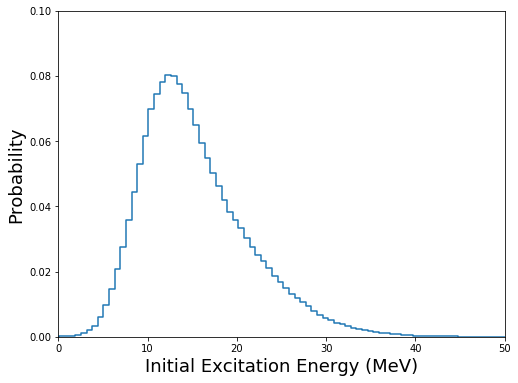

In [7]:
fig=figure(figsize(8,6))
h,b = np.histogram(U,bins=100,density=True)
plt.step(b[:-1],h)
plt.xlim(0,50)
plt.xlabel("Initial Excitation Energy (MeV)",fontsize=18)
plt.ylim(0,0.1)
plt.ylabel("Probability",fontsize=18)
plt.show()

Separating the distributions for the light and heavy fragments can be done by recognizing that 

In [8]:
Ul = yields.getULF()  # light fragments
Uh = yields.getUHF() # heavy fragments

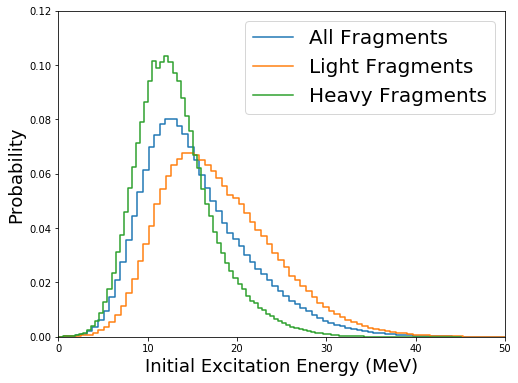

In [11]:
fig=figure(figsize(8,6))
h,b = np.histogram(U,bins=100,density=True)
hl,bl = np.histogram(Ul,bins=100,density=True)
hh,bh = np.histogram(Uh,bins=100,density=True)
plt.step(b[:-1],h,label="All Fragments")
plt.step(bl[:-1],hl,label="Light Fragments")
plt.step(bh[:-1],hh,label="Heavy Fragments")
plt.xlim(0,50)
plt.xlabel("Initial Excitation Energy (MeV)",fontsize=18)
plt.ylim(0,0.12)
plt.ylabel("Probability",fontsize=18)
lg=plt.legend(fontsize=20)
plt.show()

Similar plots and statistical analyses can be carried out for any initial quantity.

A summary table can also be easily printed

In [14]:
yields.summaryTable()

,All Fragments,Light Fragments,Heavy Fragments
A,126.00,108.62,143.38
Z,49.00,42.63,55.37
TXE / U (MeV),32.06,18.52,13.54
TKE / KE (MeV),185.78,105.57,80.21
J ($\hbar$),9.34,8.85,9.83
parity,0.00,0.00,0.00
